### You are not expected to understand the code in the notebook. The important thing is to understand the behaviour of the various models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



## Create 200 samples

In [2]:
# Creating x and y array with a polynomial relationship
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 200)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 200)
x = x[:, np.newaxis]
y = y[:, np.newaxis]



## Feature scaling

In [3]:
# Scaling the inputs
scaler = StandardScaler()
x = scaler.fit_transform(x)



## Linear and Polynomial Regression

In [4]:
# Simple Linear Regression
model1 = LinearRegression()
model1.fit(x, y)
y_pred1 = model1.predict(x)

# Polynomial Regression
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)
y_poly_pred = model2.predict(x_poly)





## Neural Network - Case1: 1 hidden layer, relu activation, no batch

In [5]:
# Neural Network
model3 = Sequential()
model3.add(Dense(200, input_dim=1, activation='relu'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model3.fit(x, y, epochs=1000, verbose=0)
y_nn_pred = model3.predict(x)

7/7 [==============================] - 0s 0s/step


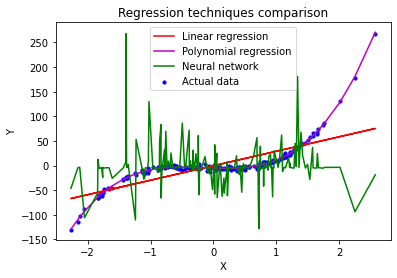

In [6]:
# Plotting
plt.scatter(x, y, s=10, color='b', label='Actual data')

# Simple Linear Regression
plt.plot(x, y_pred1, color='r', label='Linear regression')

# Polynomial Regression
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m', label='Polynomial regression')

# Neural Network
sorted_zip = sorted(zip(x,y_nn_pred), key=sort_axis)
x, y_nn_pred = zip(*sorted_zip)
plt.plot(x, y_nn_pred, color='g', label='Neural network')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression techniques comparison')
plt.legend()
plt.show()


## Neural Network - Case2: 1 hidden layer, tanh activation, no batch

7/7 [==============================] - 0s 1ms/step


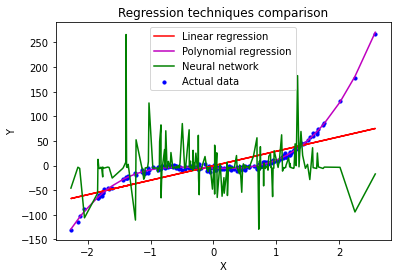

In [7]:
# Creating x and y array with a polynomial relationship
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 200)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 200)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Scaling the inputs
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Simple Linear Regression
model1 = LinearRegression()
model1.fit(x, y)
y_pred1 = model1.predict(x)

# Polynomial Regression
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)
y_poly_pred = model2.predict(x_poly)

# Neural Network - Case 2: 1 hidden layer, tanh activation
model3 = Sequential()
model3.add(Dense(200, input_dim=1, activation='tanh'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model3.fit(x, y, epochs=1000, verbose=0)
y_nn_pred = model3.predict(x)

# Plotting
plt.scatter(x, y, s=10, color='b', label='Actual data')

# Simple Linear Regression
plt.plot(x, y_pred1, color='r', label='Linear regression')

# Polynomial Regression
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m', label='Polynomial regression')

# Neural Network
sorted_zip = sorted(zip(x,y_nn_pred), key=sort_axis)
x, y_nn_pred = zip(*sorted_zip)
plt.plot(x, y_nn_pred, color='g', label='Neural network')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression techniques comparison')
plt.legend()
plt.show()


## Neural Network - Case3: Increase data, 1 hidden layer, tanh activation, introduce batch processing

625/625 [==============================] - 1s 805us/step


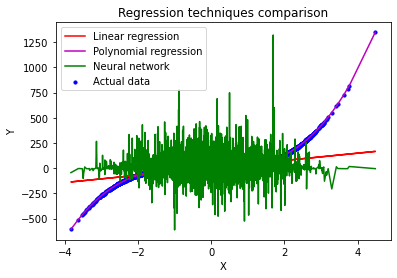

In [8]:
# Creating x and y array with a polynomial relationship
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20000)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20000)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Scaling the inputs
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Simple Linear Regression
model1 = LinearRegression()
model1.fit(x, y)
y_pred1 = model1.predict(x)

# Polynomial Regression
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly, y)
y_poly_pred = model2.predict(x_poly)

# Neural Network
model3 = Sequential()
model3.add(Dense(200, input_dim=1, activation='tanh'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model3.fit(x, y, epochs=1000, batch_size=64, verbose=0)
y_nn_pred = model3.predict(x)

# Plotting
plt.scatter(x, y, s=10, color='b', label='Actual data')

# Simple Linear Regression
plt.plot(x, y_pred1, color='r', label='Linear regression')

# Polynomial Regression
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m', label='Polynomial regression')

# Neural Network
sorted_zip = sorted(zip(x,y_nn_pred), key=sort_axis)
x, y_nn_pred = zip(*sorted_zip)
plt.plot(x, y_nn_pred, color='g', label='Neural network')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression techniques comparison')
plt.legend()
plt.show()


## Neural Network - Case4: Increase number of hidden layers

In [9]:
# Creating x and y array with a polynomial relationship
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20000)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20000)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Scaling the inputs
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [10]:
# Neural Network
model3 = Sequential()
model3.add(Dense(200, input_dim=1, activation='tanh'))
model3.add(Dense(200, activation='tanh'))
model3.add(Dense(200, activation='tanh'))
model3.add(Dense(1, activation='linear'))
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))
model3.fit(x, y, epochs=1000, batch_size=64, verbose=0)




In [11]:
y_nn_pred = model3.predict(x)

625/625 [==============================] - 1s 1ms/step


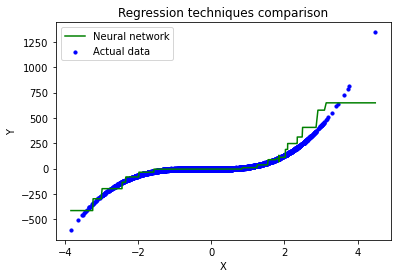

In [12]:
# Plotting
plt.scatter(x, y, s=10, color='b', label='Actual data')

# Neural Network
sorted_zip = sorted(zip(x,y_nn_pred), key=sort_axis)
x, y_nn_pred = zip(*sorted_zip)
plt.plot(x, y_nn_pred, color='g', label='Neural network')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression techniques comparison')
plt.legend()
plt.show()